In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

2022-11-17 02:35:42.479783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 02:35:42.643548: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 02:35:43.223103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/exouser/anaconda3/lib/
2022-11-17 02:35:43.223172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: 

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-11-17 02:35:46.198646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 02:35:46.203915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 02:35:46.204070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [4]:
res_model = keras.applications.ResNet101V2(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3)
)

2022-11-15 23:34:38.125265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 23:34:38.125701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 23:34:38.125896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 23:34:38.126026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
train_datagen_augmented=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen_augmented.fit(x_train)


In [6]:
model1 = keras.models.Sequential()
model1.add(res_model)
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512,activation='relu'))
model1.add(keras.layers.GaussianDropout(0.5))
model1.add(keras.layers.Dense(1024,activation='relu'))
model1.add(keras.layers.GaussianDropout(0.5))           
model1.add(keras.layers.Dense(100,activation='softmax'))

In [7]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

/home/exouser/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 1, 1, 2048)        42626560  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 gaussian_dropout (GaussianD  (None, 512)              0         
 ropout)                                                         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 gaussian_dropout_1 (Gaussia  (None, 1024)             0         
 nDropout)                                              

In [10]:
with tf.device("/GPU:0"):
    history1=model1.fit(
        x_train,
        y_train,
        batch_size=128,
        epochs=30,
        validation_split=0.2
    )

Epoch 1/30


2022-11-15 23:35:09.423947: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-11-15 23:35:10.005929: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 23:35:10.006629: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 23:35:10.006671: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-15 23:35:10.007141: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 23:35:10.007220: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-11-15 23:35:10.689938: I tensorflow/stream_executor/cuda/c

313/313 [==============================] - 19s 38ms/step - loss: 4.6457 - accuracy: 0.0116 - val_loss: 4.5639 - val_accuracy: 0.0182
Epoch 2/30
313/313 [==============================] - 10s 33ms/step - loss: 4.5040 - accuracy: 0.0268 - val_loss: 4.3847 - val_accuracy: 0.0470
Epoch 3/30
313/313 [==============================] - 11s 34ms/step - loss: 4.2983 - accuracy: 0.0523 - val_loss: 4.1630 - val_accuracy: 0.0739
Epoch 4/30
313/313 [==============================] - 11s 34ms/step - loss: 4.0600 - accuracy: 0.0876 - val_loss: 3.8825 - val_accuracy: 0.1176
Epoch 5/30
313/313 [==============================] - 11s 34ms/step - loss: 3.7113 - accuracy: 0.1465 - val_loss: 3.5526 - val_accuracy: 0.1862
Epoch 6/30
313/313 [==============================] - 11s 34ms/step - loss: 3.2808 - accuracy: 0.2194 - val_loss: 3.1015 - val_accuracy: 0.2528
Epoch 7/30
313/313 [==============================] - 11s 36ms/step - loss: 2.8086 - accuracy: 0.2968 - val_loss: 2.6951 - val_accuracy: 0.3264
Epo

In [4]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 30
image_size = 72 
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 128
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 10
mlp_head_units = [2048, 1024] 

In [11]:
_,acc=model1.evaluate(x_test,y_test)
print("the accuracy is: {}".format(acc*100))

313/313 [==============================] - 3s 10ms/step - loss: 3.3324 - accuracy: 0.4793
the accuracy is: 47.929999232292175


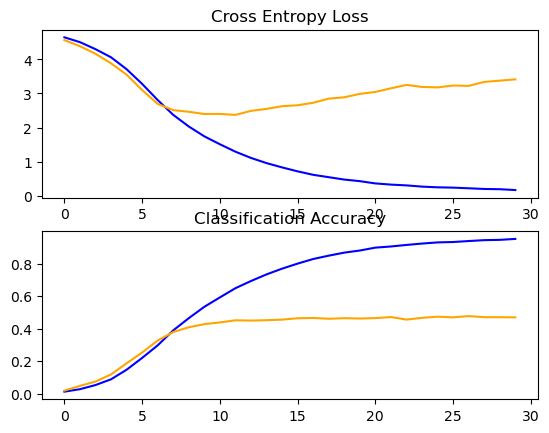

In [12]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='orange', label='test')

In [5]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)


2022-11-17 02:36:02.281880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 02:36:02.282291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 02:36:02.282472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 02:36:02.282592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [7]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [8]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


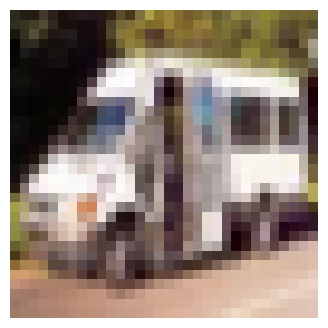

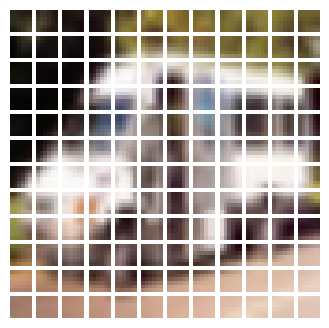

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [10]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [11]:
def run_experiment(model):
    optimizer = tf.optimizers.Adam(
        learning_rate=learning_rate
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

   
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
    )
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/30
   1/1407 [..............................] - ETA: 4:48:43 - loss: 7.4651 - accuracy: 0.0000e+00 - top-5-accuracy: 0.0938

2022-11-17 02:36:38.418653: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1407/1407 [==============================] - 293s 200ms/step - loss: 4.7746 - accuracy: 0.0109 - top-5-accuracy: 0.0540 - val_loss: 4.6067 - val_accuracy: 0.0088 - val_top-5-accuracy: 0.0476
Epoch 2/30
1407/1407 [==============================] - 269s 191ms/step - loss: 4.6077 - accuracy: 0.0095 - top-5-accuracy: 0.0482 - val_loss: 4.6074 - val_accuracy: 0.0074 - val_top-5-accuracy: 0.0462
Epoch 3/30
1407/1407 [==============================] - 265s 188ms/step - loss: 4.6079 - accuracy: 0.0096 - top-5-accuracy: 0.0475 - val_loss: 4.6089 - val_accuracy: 0.0080 - val_top-5-accuracy: 0.0426
Epoch 4/30
1407/1407 [==============================] - 269s 191ms/step - loss: 4.6333 - accuracy: 0.0091 - top-5-accuracy: 0.0484 - val_loss: 4.6096 - val_accuracy: 0.0092 - val_top-5-accuracy: 0.0476
Epoch 5/30
1407/1407 [==============================] - 271s 193ms/step - loss: 4.6083 - accuracy: 0.0101 - top-5-accuracy: 0.0488 - val_loss: 4.6103 - val_accuracy: 0.0106 - val_top-5-accuracy: 0.0448
E

In [13]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 72, 72, 3)   7           ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 108)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 144, 128)     32384       ['patches_1[0][0]']              
                                                                                              

 multi_head_attention_3 (MultiH  (None, 144, 128)    527488      ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 144, 128)     0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 144, 128)    256         ['add_6[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_7 (Dense)                (None, 144, 256)     33024       ['layer_normalization_7[0][0]']  
          

                                                                                                  
 dropout_13 (Dropout)           (None, 144, 128)     0           ['dense_14[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 144, 128)     0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 144, 128)    256         ['add_13[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_7 (MultiH  (None, 144, 128)    527488      ['layer_normalization_14[0][0]', 
 eadAttent

                                                                                                  
 dropout_21 (Dropout)           (None, 2048)         0           ['dense_21[0][0]']               
                                                                                                  
 dense_22 (Dense)               (None, 1024)         2098176     ['dropout_21[0][0]']             
                                                                                                  
 dropout_22 (Dropout)           (None, 1024)         0           ['dense_22[0][0]']               
                                                                                                  
 dense_23 (Dense)               (None, 100)          102500      ['dropout_22[0][0]']             
                                                                                                  
Total params: 45,923,307
Trainable params: 45,923,300
Non-trainable params: 7
_______________________________

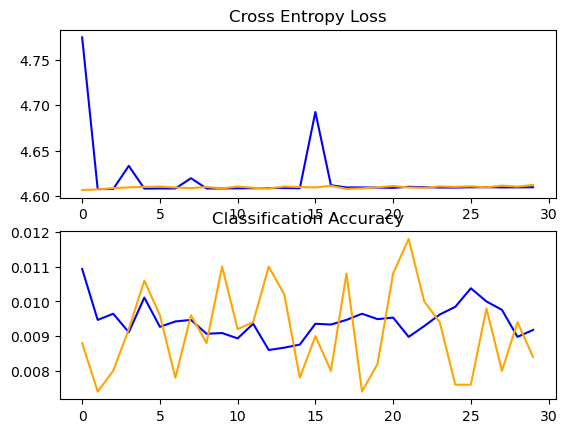

In [14]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')